# Initial PyBigDFT tour - Basic functionalities
we start by presenting a broad overview of using the PyBigDFT library to drive BigDFT calculations using Python.
If you have installed from source, you should make sure you have setup the proper environment variables using the following command:

```
source install/bin/bigdftvars.sh
```

For this tutorial, we have to ensure at least the installation of the bigdft client.

In [ ]:
# in the google colab session this can be done with the following command:
!wget https://gitlab.com/luigigenovese/bigdft-school/-/raw/main/packaging/install.py &> /dev/null
import install
install.client(locally=True)

In [9]:
# we also need to install the py3dmol package in this case
install.packages('py3Dmol')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## System Manipulation
Here we define a system which is composed of two fragments: H2 and Helium.

In [4]:
# to have a cleaner output
import warnings
warnings.filterwarnings("ignore")

In [5]:
from BigDFT.Systems import System
from BigDFT.Fragments import Fragment
from BigDFT.Atoms import Atom

In [6]:
# Create Three Atoms
at1 = Atom({"H": [0, 0, 0], "units": "bohr"})
at2 = Atom({"H": [0, 0, 1.4], "units": "bohr"})
at3 = Atom({"He": [10, 0, 0], "units": "bohr"})
# Construct a System from Two Fragments (H2, He)
sys = System()
sys["H2:1"] = Fragment([at1, at2])
sys["He:2"] = Fragment([at3])

# Iterate Over The System to inspect the atoms positions
for at in sys.get_atoms():
    print(at.sym, at.get_position())
# or alternatively, two-level iteration (fragment first)
for fragid, frag in sys.items():
    print(fragid)
    for at in frag:
        print(' ', at.sym, at.get_position())

H [0.0, 0.0, 0.0]
H [0.0, 0.0, 1.4]
He [10.0, 0.0, 0.0]
H2:1
  H [0.0, 0.0, 0.0]
  H [0.0, 0.0, 1.4]
He:2
  He [10.0, 0.0, 0.0]


In [10]:
# this is what we have created
sys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

This is a very simple initial example. We will inspect in more details the constructors for a BigDFT system in the System-Generation notebook.

## Calculation
Calculate the created system using a wavelet grid spacing of $0.4$ bohr (good for the large majority of the systems) and the PBE functional. A logfile is generated from which we can access the computed properties. This logfile has built in properties and can be accessed like a dictionary.

In [11]:
from BigDFT.Inputfiles import Inputfile
inp = Inputfile()
inp.set_hgrid(0.4)
inp.set_xc("PBE")
# we remove the calculation of the forces
inp["perf"] = {"calculate_forces": False}

In [12]:
from BigDFT.Calculators import SystemCalculator
calc = SystemCalculator(skip=True, verbose=False)

In [13]:
log = calc.run(sys=sys, input=inp, name="quick", run_dir="scratch")

In [14]:
#some basic info
print(log.energy)
print(list(log.evals))
print(log.log["Memory Consumption Report"]
             ["Memory occupation"])

-4.054615157686378
[BandArray([[-0.57600357, -0.38118857]])]
{'Peak Value (MB)': 230.69, 'for the array': 'f_i', 'in the routine': 'vxcpostprocessing', 'Memory Peak of process': '342.196 MB'}


We have "executed" (the calculation result is provided with the school material here) a very simple calculation with two Kohn-Sham orbitals. The description of the possible input parameters and how to trigger larger calculations (even on remote computers) will be provided in the forthcoming lessons.

## Calculation of Periodic Systems
We setup a BCC unit cell of iron and perform the calculation using a 2x2x2 k-point grid with a Monkhorst-Pack grid.

In [15]:
from BigDFT.UnitCells import UnitCell
# one single periodic atom
pat = Atom({"Fe": [0, 0, 0], "units": "angstroem"})
psys = System({"CEL:0": Fragment([pat])})
psys.cell = UnitCell([2.867, 2.867, 2.867], units="angstroem")

In [16]:
psys.display()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [17]:
# very small k-point mesh, just for comparison
inp = Inputfile()
inp.set_hgrid(0.3)
inp.set_xc("LDA") # can be omitted as this is the default
inp["kpt"] = {"method": "mpgrid", "ngkpt": [2, 2, 2]}

In [18]:
log = calc.run(sys=psys, input=inp, name="psys", run_dir="scratch")

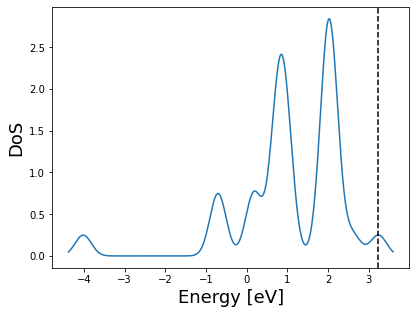

In [19]:
# NBVAL_IGNORE_OUTPUT
_ = log.get_dos().plot()

After this first tour, we can explore further those functionalities with the following tutorials.

In [ ]:
#this is helpful to preserve the py3dmol installation
install.close_drive()